In [1]:
from pathlib import Path
import sys

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

project_root = Path('..').resolve()
print('Project root:', project_root)

src_path = project_root / 'src'
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

from uais.anomaly.train_isolation_forest import train_isolation_forest, compute_anomaly_score
from uais.utils.metrics import compute_classification_metrics
from uais.utils.plotting import plot_roc_curve, plot_pr_curve


Project root: /Users/pratik_n/Desktop/MyComputer/universal-anomaly-intelligence


In [2]:
feats_path = project_root / 'data' / 'processed' / 'fraud' / 'fraud_features.parquet'
df_feats = pd.read_parquet(feats_path)

target_col = 'Class'
X = df_feats.drop(columns=[target_col])
y = df_feats[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print('Train:', X_train.shape, 'Test:', X_test.shape)


Train: (227845, 34) Test: (56962, 34)


In [3]:
iso_model, scaler = train_isolation_forest(
    X_train,
    random_state=42,
    contamination=0.01,
)

anomaly_scores_test = compute_anomaly_score(iso_model, scaler, X_test)
print('Anomaly scores (test) min/max:', anomaly_scores_test.min(), anomaly_scores_test.max())


Anomaly scores (test) min/max: 0.0 1.0


Metrics using anomaly scores alone:
roc_auc: 0.9507
pr_auc: 0.1248
f1: 0.1308
precision: 0.0720
recall: 0.7143
accuracy: 0.9837


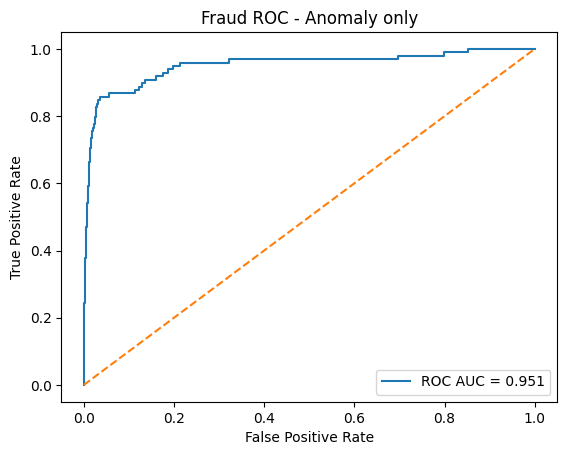

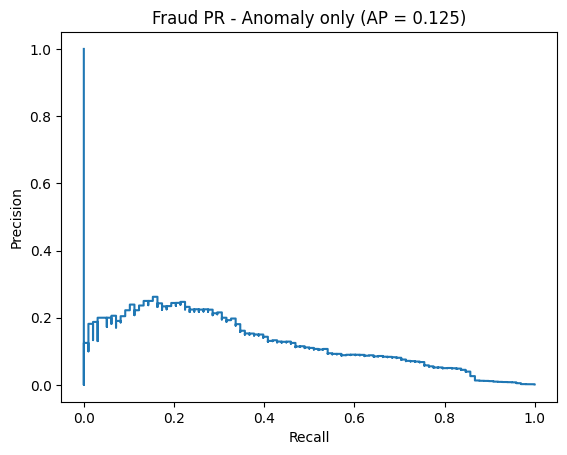

In [4]:
anomaly_metrics = compute_classification_metrics(y_test.values, anomaly_scores_test, threshold=0.5)

print('Metrics using anomaly scores alone:')
for k, v in anomaly_metrics.items():
    print(f"{k}: {v:.4f}")

plot_roc_curve(y_test.values, anomaly_scores_test, title='Fraud ROC - Anomaly only')
plot_pr_curve(y_test.values, anomaly_scores_test, title='Fraud PR - Anomaly only')
